# NextGEMS data

> [!NOTE]
> The online laboratory has only been tested in recent Firefox and Chrome browsers. Some features may not (yet) be supported in Safari browsers.

> [!CAUTION]
> Any changes you make to this notebook will be lost once the page is closed or refreshed. Please download any files you would like to keep.

This notebook is a comprehensive guide to accessing Zarr directory for an ICON simulation within the 4th model cycle phase of the NextGEMS project. It includes details about the available parameters and steps, along with instructions for using the `load_NextGEMS_data` function to access these data from the [ECMWF S3 bucket](https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/EW3_ICON_ngc4008_90d_Compression_test.zarr/). The Zarr data is not downloaded locally; instead, it is accessed remotely using `zarr`.

---

## Experiment Details and Available Data Fields

The dataset comprises output data from an ICON run within the 4th model cycle phase of the NextGEMS project (NGC4008). This simulation spans a total of 30 years and uses an ssp370-like scenario run from 2020.
The simulation was performed using a horizontal grid spacing of approximately 100 km (R2B8/8). 
However, only a subset of the data is provided: three months of data for four selected variables at three model levels.
A global, coupled simulation covering a time period of 1000 years, starting in 1300, was run. 48-hourly output data was generated throughout the simulation.
The data is stored on a HEALPix grid with lossless compression, and the total size of the available dataset is approximately 9 GB.

The dataset is contained in a Zarr directory.

The following 2D parameters are available:
```python
["hus", "pr" "ua", "va"]
```
The following model levels are available:
```python
[89, 65, 55]
```


The available time steps begin at 2020-01-02 00:00:00 UTC, increasing in 2-day steps until 2020-03-31 00:00:00 UTC.



## Using the `load_NextGEMS_data` Function

To load the Zarr directory, you can use the following function:

```python
load_NextGEMS_data()
```

This function is straightforward and does not require any parameters.


In [29]:
# URL of S3 bucket
BASE_URL = "https://object-store.os-api.cci1.ecmwf.int/esiwacebucket"

First, the package `zarr` (modern dataset format that is specifically designed for chunked access) and its dependencies need to be imported for the remote access.

In [30]:
import fsspec
import zarr

The `load_NextGEMS_data` function simplifies remote access to Zarr datasets stored on the S3 bucket. It loads the data efficiently as an xarray dataset.


In [31]:
import json

import xarray as xr


def load_NextGEMS_data():

    url = f"{BASE_URL}/EW3_ICON_ngc4008_90d_Compression_test.zarr"

    print(f"Loading dataset {url}")

    return xr.open_dataset( url, engine="zarr", chunks=dict(),)

## Example Usage

To load the Zarr directory, you can use the following example. This will load the whole dataset. 

In [32]:
ds = load_NextGEMS_data()
ds

Loading dataset https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/EW3_ICON_ngc4008_90d_Compression_test.zarr


<xarray.Dataset>
Dimensions:     (time: 90, level_full: 3, cell: 3145728)
Coordinates:
  * level_full  (level_full) float64 89.0 65.0 55.0
  * time        (time) datetime64[ns] 2020-01-02 2020-01-03 ... 2020-03-31
Dimensions without coordinates: cell
Data variables:
    hus         (time, level_full, cell) float32 dask.array<chunksize=(3, 1, 196608), meta=np.ndarray>
    pr          (time, cell) float32 dask.array<chunksize=(3, 196608), meta=np.ndarray>
    ua          (time, level_full, cell) float32 dask.array<chunksize=(3, 1, 196608), meta=np.ndarray>
    va          (time, level_full, cell) float32 dask.array<chunksize=(3, 1, 196608), meta=np.ndarray>

Since tha data is stored on a HEALPix grid `earthkit` cannot be used to plot this data and the `pyicon` library is used here.

In [33]:
import pyicon as pyic

The data can be visualized as demonstrated below. For example, the specific humidity on **2020-02-01 at 00:00:00 UTC** at model level 89 is plotted.


/Users/ecm5945/Documents/ECMWF/Code/data_compression/venv/lib/python3.10/site-packages/pyicon/pyicon_tb.py:451: PerformanceWarning: Slicing with an out-of-order index is generating 332 times more chunks
  arr_interp = xr.DataArray(arr.data[pix].reshape(Lon.shape), dims=['lat', 'lon'], coords=dict(lat=lat, lon=lon))


(<GeoAxesSubplot:title={'left':'level_full = 89.0 ','right':'2020-02-01T00:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x33d638f40>])

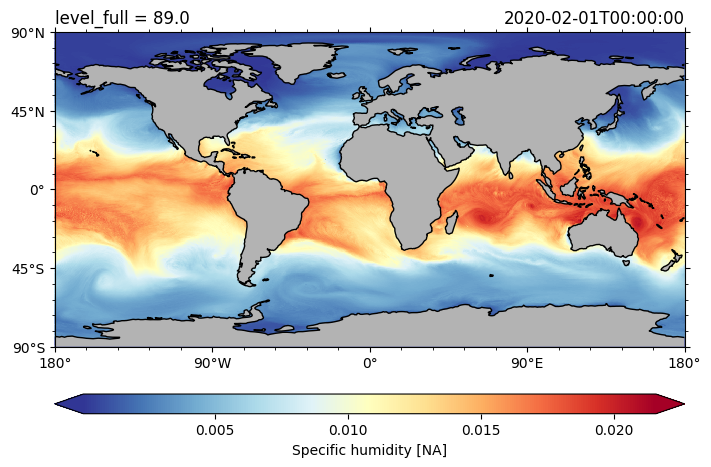

In [34]:
da_hus = ds.hus.isel(time=30, level_full=0)
da_hus.pyic.plot()


Zonal and Meridional wind can be visualized in the same way.


The precipitation flux on **2020-03-31 at 00:00:00 UTC** is plotted as demonstrated below.


/Users/ecm5945/Documents/ECMWF/Code/data_compression/venv/lib/python3.10/site-packages/pyicon/pyicon_tb.py:451: PerformanceWarning: Slicing with an out-of-order index is generating 332 times more chunks
  arr_interp = xr.DataArray(arr.data[pix].reshape(Lon.shape), dims=['lat', 'lon'], coords=dict(lat=lat, lon=lon))


(<GeoAxesSubplot:title={'right':'2020-03-31T00:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x3322c7100>])

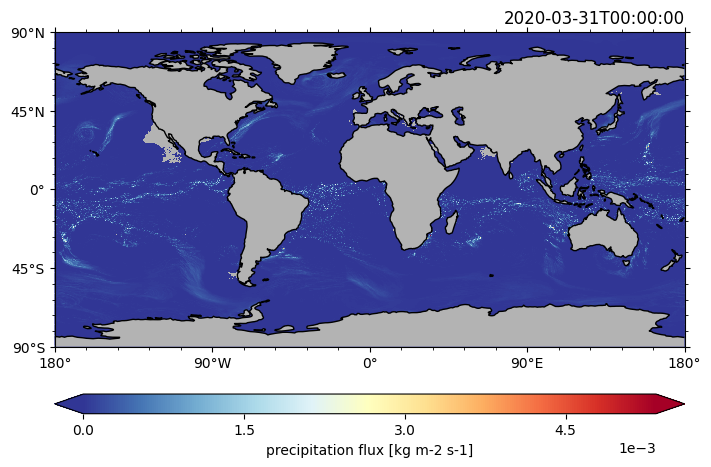

In [35]:
da_pr = ds.pr.isel(time=89)
da_pr.pyic.plot()